### The following project is based on application of Data Science in Retail Sector. It makes use of dataset regarding to Walmart retail store, one of the leading retail stores in USA,provided with data associated to 45 different stores which includes sales made, whether there was holiday season or not when sales was made.

### Also, we need to check whether factors like Fuel_Price, CPI, Unemployment have an impact on the sales made or not.

### We need to build a predictive model which is to be used to predict sales based on list of several factors, with much better accuracy

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
# Import the dataset
df_walmart=pd.read_csv(r"C:/Users/RitwikBijalwan_25/project_work/python/Walmart_Store_sales.csv")
df_walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
# Number of rows (observations) and columns(features or attributes)
df_walmart.shape

(6435, 8)

In [4]:
# Datatype of columns
df_walmart.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [5]:
# Converting Date as datetime object
df_walmart['Date']=pd.to_datetime(df_walmart['Date'],format="%d-%m-%Y")

df_walmart.Weekly_Sales=df_walmart.Weekly_Sales.round(2)
df_walmart.Temperature=df_walmart.Temperature.round(2)
df_walmart.Fuel_Price=df_walmart.Fuel_Price.round(2)
df_walmart.CPI=df_walmart.CPI.round(2)
df_walmart.Unemployment=df_walmart.Unemployment.round(2)

In [6]:
df_walmart.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11


In [7]:
# Any missing values?
df_walmart.isnull().any().sum()

0

##### There is no missing value present in the dataset, hence no need to perform any missing value treatment 

In [8]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


Lets divide dates into individual units like year, month, days and quarter

In [9]:
df_walmart['Date1']=df_walmart['Date'].dt.strftime("%Y-%m-%d")
df_walmart['Year']=df_walmart['Date'].dt.year
df_walmart['Month']=df_walmart['Date'].dt.month
df_walmart['Day']=df_walmart['Date'].dt.day
df_walmart['Quarter']=df_walmart['Date'].dt.quarter

In [10]:
df_walmart[df_walmart.Holiday_Flag==1]['Date1'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

We have in total 10 dates that represents holiday season. Lets encode each individual date with encoded values starting from 1 

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_walmart['Date']=(le.fit_transform(df_walmart['Date'])+1)

In [12]:
df_walmart.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date1,Year,Month,Day,Quarter
0,1,1,1643690.90,0,42.31,2.57,211.10,8.11,2010-02-05,2010,2,5,1
1,1,2,1641957.44,1,38.51,2.55,211.24,8.11,2010-02-12,2010,2,12,1


In [13]:
df_walmart.isnull().any().sum()

0

In [14]:
df_walmart1=df_walmart.copy() # used to perform outlier treatment on the data( may result in data loss) and apply treated data to model building
df_walmart1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date1,Year,Month,Day,Quarter
0,1,1,1643690.90,0,42.31,2.57,211.10,8.11,2010-02-05,2010,2,5,1
1,1,2,1641957.44,1,38.51,2.55,211.24,8.11,2010-02-12,2010,2,12,1
2,1,3,1611968.17,0,39.93,2.51,211.29,8.11,2010-02-19,2010,2,19,1
3,1,4,1409727.59,0,46.63,2.56,211.32,8.11,2010-02-26,2010,2,26,1
4,1,5,1554806.68,0,46.50,2.62,211.35,8.11,2010-03-05,2010,3,5,1


## Outlier detection and treatment

<AxesSubplot:>

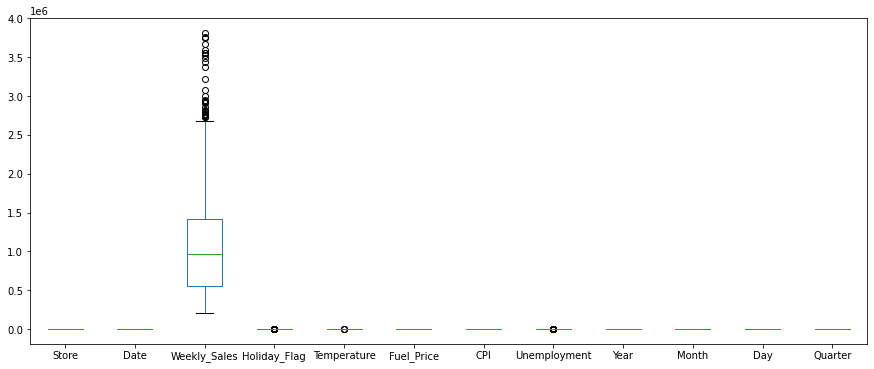

In [15]:
df_walmart1.plot(kind='box',figsize=(15,6))

In [16]:
df_walmart1['Holiday_Flag'].unique()

array([0, 1], dtype=int64)

### We have outliers Weekly_Sales, Temperature and Unemployment, so we need to perform appropriate actions as per quantity of outliers. Here, Holiday_Flag is not considered as being having outliers because it has only two values- 0 and 1 which represents as being a category rather than being continous in nature.

#### Outlier for Weekly_Sales

<AxesSubplot:>

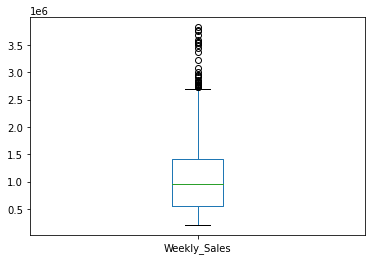

In [17]:
df_walmart1['Weekly_Sales'].plot(kind='box')

In [18]:
df_walmart1['Weekly_Sales'].describe()

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

In [19]:
# Upper bound for Weekly_Sales
round(df_walmart1['Weekly_Sales'].quantile(.75)+((df_walmart1['Weekly_Sales'].quantile(.75)-df_walmart1['Weekly_Sales'].quantile(.25))*1.5),2)

2720371.49

In [20]:
df_walmart1[df_walmart1['Weekly_Sales']>2720371.49]['Weekly_Sales'].count()

34

We have 34 upper bounded outlier values for Weekly_Sales. Options that we have to deal with such values are either we drop them, or replace them with the statistical values like mean/median/mode or include them as upper bound limit or lower bound limit values.
Here, we will try to include them in the distribution in the form of upper bound limit values rather than being using them as mean/median/mode.

<AxesSubplot:>

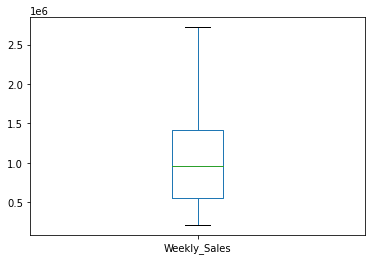

In [21]:
df_walmart1.loc[df_walmart1.Weekly_Sales>2720371.49,'Weekly_Sales']=2720371.49
df_walmart1.Weekly_Sales.plot(kind='box')

#### Outlier treatment for Temperature 

<AxesSubplot:>

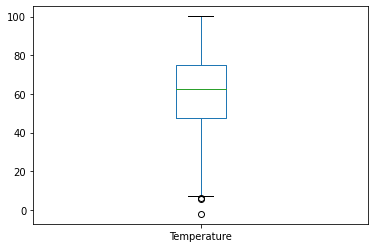

In [22]:
df_walmart1['Temperature'].plot(kind='box')

### We have outliers in lower bound for Temperature, hence we need to treat the outliers according  

count    6435.000000
mean       60.663782
std        18.444933
min        -2.060000
25%        47.460000
50%        62.670000
75%        74.940000
max       100.140000
Name: Temperature, dtype: float64 

AxesSubplot(0.125,0.125;0.775x0.755) 



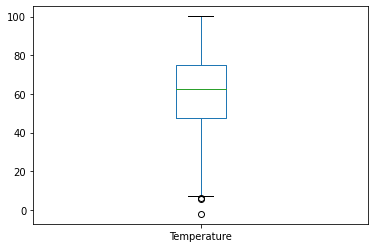

In [23]:
print(df_walmart1['Temperature'].describe(),'\n')
print(df_walmart1['Temperature'].plot(kind='box'),'\n')


In [24]:
# Lower bound for Temperature
(df_walmart1['Temperature'].quantile(.25)-((df_walmart1['Temperature'].quantile(.75)-df_walmart1['Temperature'].quantile(.25))*1.5))

6.240000000000002

In [25]:
# Number of outlier values
df_walmart1[df_walmart1['Temperature']<=6.24]['Temperature'].count()

3

In [26]:
df_walmart1[df_walmart1['Temperature']<6.24]['Temperature'].unique()

array([-2.06,  6.23,  5.54])

#### using transformation will further induce outliers hence we should not opt for transformation as one of the possible option for outliers of Temperature 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

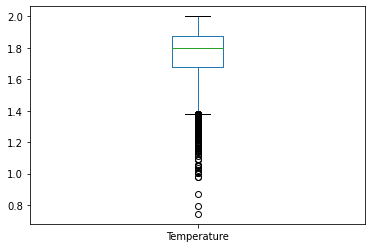

In [27]:
np.log10(df_walmart1['Temperature']).plot(kind='box')

Instead of doing log transformation (or any other kind of transformations), we should either drop these values, or replace them with mean/median/mode or shift them to end of distributions (at upper or lower bound).
Here, we prefer to retain these values so that there may be no loss of information.

In [28]:
df_walmart1.loc[df_walmart1.Temperature<6.25,'Temperature']=6.25
df_walmart1.Temperature.describe()

count    6435.000000
mean       60.665187
std        18.440494
min         6.250000
25%        47.460000
50%        62.670000
75%        74.940000
max       100.140000
Name: Temperature, dtype: float64

<AxesSubplot:>

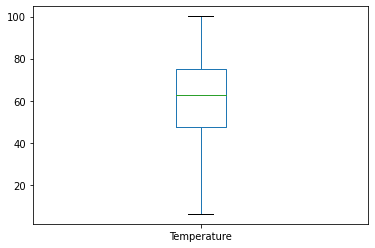

In [29]:
df_walmart1.Temperature.plot(kind='box')

#### Outlier treatments for Unemployment

<AxesSubplot:>

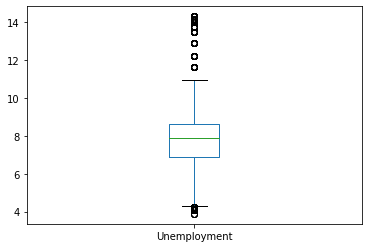

In [30]:
df_walmart1[['Unemployment']].plot(kind='box')

### In case of Unemployment, we have bidirectional outliers,i.e, we have to consider both upper bound and lower bound to avoid outliers

In [31]:
df_walmart1['Unemployment'].describe()

count    6435.000000
mean        7.998831
std         1.876046
min         3.880000
25%         6.890000
50%         7.870000
75%         8.620000
max        14.310000
Name: Unemployment, dtype: float64

#### Similar to the case of Temperature, using transformation will result in inducing new outliers hence we should deal with outliers taking into consideration of upper and lower bounds

<AxesSubplot:>

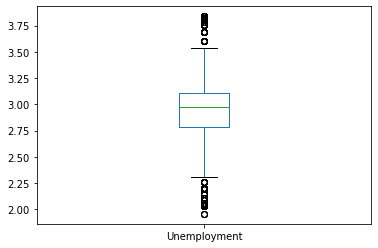

In [32]:
np.log2(df_walmart1['Unemployment']).plot(kind='box')

Available options are either dropping them or imputing them. Dropping these values will definitely result in loss of information so we will ignore this option. Imputation to be done can be either statistical one or end of the distribution one, statistical imputation is not going have much impact on distribution of the Unemployment variable. So, we will impute them as upper bounded and lower bounded values.

In [33]:
upper_bound=df_walmart1['Unemployment'].quantile(.75)+((df_walmart1['Unemployment'].quantile(.75)-df_walmart1['Unemployment'].quantile(.25))*1.5)
lower_bound=df_walmart1['Unemployment'].quantile(.25)-((df_walmart1['Unemployment'].quantile(.75)-df_walmart1['Unemployment'].quantile(.25))*1.5)

In [34]:
upper_bound,lower_bound

(11.214999999999998, 4.295)

In [35]:
df_walmart1.loc[df_walmart1.Unemployment>upper_bound,'Unemployment']=upper_bound
df_walmart1.loc[df_walmart1.Unemployment<lower_bound,'Unemployment']=lower_bound
df_walmart1.Unemployment.describe()

count    6435.000000
mean        7.870658
std         1.520264
min         4.295000
25%         6.890000
50%         7.870000
75%         8.620000
max        11.215000
Name: Unemployment, dtype: float64

<AxesSubplot:>

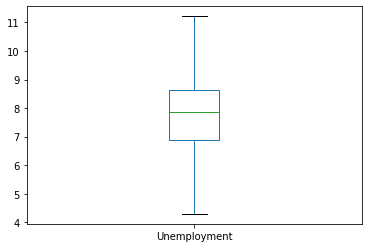

In [36]:
df_walmart1.Unemployment.plot(kind='box')

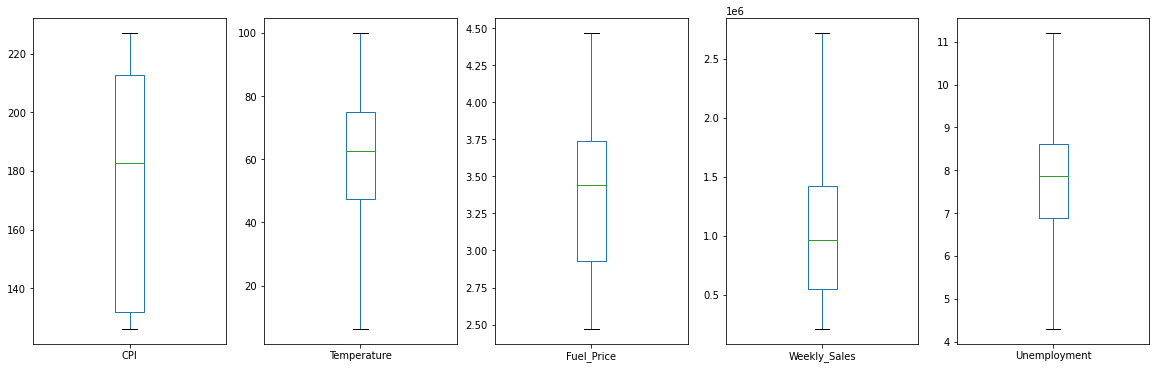

In [37]:
df_walmart1[['CPI','Temperature','Fuel_Price','Weekly_Sales','Unemployment']].plot(kind='box',subplots=True,figsize=(20,6))
plt.show()

In [38]:
df_walmart1.shape

(6435, 13)

## Now our data is free from outliers and also we do not have any missing values, we have final observations as  6435 as we have given more importance to retaining the data rather than just dropping it. Also, if we opted not to deal with outliers, it would have given falsified results.

# Exploratory Data Analysis 

In [39]:
# Overall sales per Stores
df1=df_walmart.groupby("Store").sum()[['Weekly_Sales']].sort_values("Weekly_Sales",ascending=False)
df1.rename(columns={"Weekly_Sales":"Overall_Sales"},inplace=True)
df1=df1.round(1);print(df1.head(),'\n')#.style.background_gradient(cmap="Blues")
print(df1.tail(8))

       Overall_Sales
Store               
20       301397792.5
4        299543953.4
14       288999911.3
13       286517703.8
2        275382441.0 

       Overall_Sales
Store               
37        74202740.3
30        62716885.1
3         57586735.1
38        55159626.4
36        53412215.0
5         45475688.9
44        43293087.8
33        37160222.0


<AxesSubplot:xlabel='Store'>

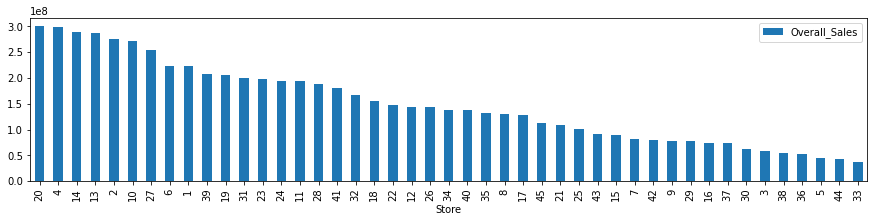

In [40]:
df1.plot(kind='bar',figsize=(15,3))

array([<AxesSubplot:ylabel='Overall_Sales'>], dtype=object)

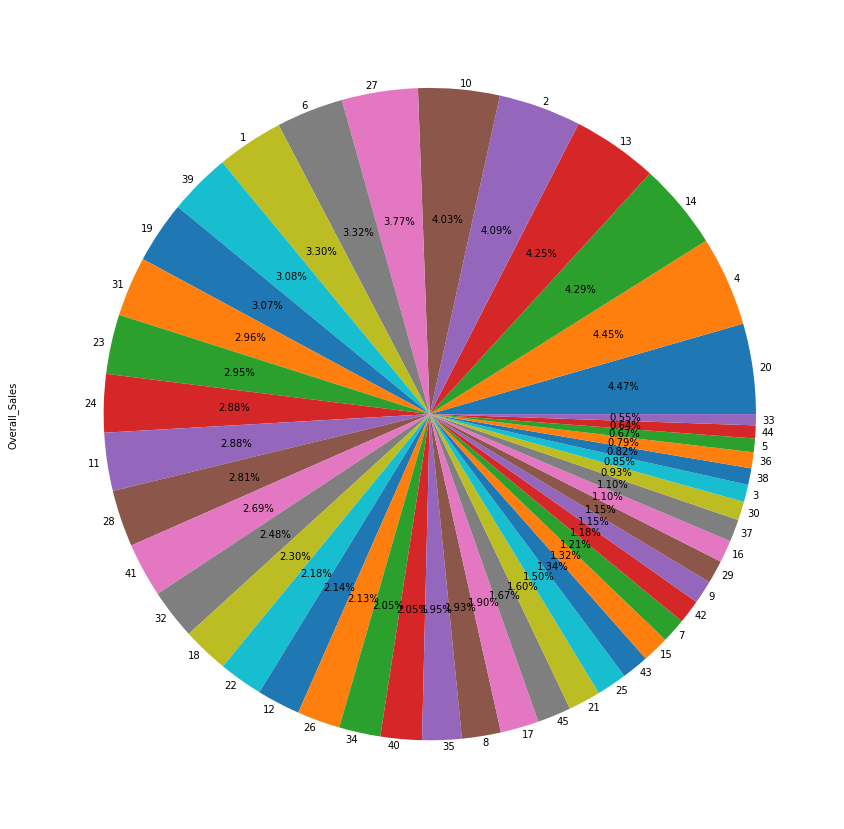

In [41]:
df1.plot(df1.Overall_Sales,kind='pie',autopct='%1.2f%%',figsize=(15,15),subplots=True,legend=False,labeldistance=1.02)

Maximum sales is made by store 20 (4.63% of overall sales made)closely followed by stores 4 and 14 whereas least sales is made by store 33 and 44...

In [42]:
# Average sales per Stores
df2=df_walmart.groupby("Store").mean()[['Weekly_Sales']].sort_values("Weekly_Sales",ascending=False)
df2.rename(columns={"Weekly_Sales":"Average_Sales"},inplace=True)
df2=df2.round(1);print(df2.head(),'\n')#.style.background_gradient(cmap='PuBu')
print(df2.tail(8))

       Average_Sales
Store               
20         2107676.9
4          2094713.0
14         2020978.4
13         2003620.3
2          1925751.3 

       Average_Sales
Store               
37          518900.3
30          438579.6
3           402704.4
38          385731.7
36          373512.0
5           318011.8
44          302748.9
33          259861.7


<AxesSubplot:xlabel='Store'>

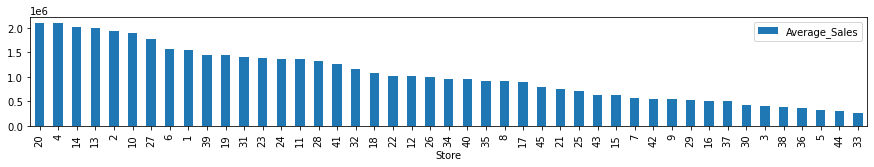

In [43]:
df2.plot(kind='bar',figsize=(15,2))

array([<AxesSubplot:ylabel='Average_Sales'>], dtype=object)

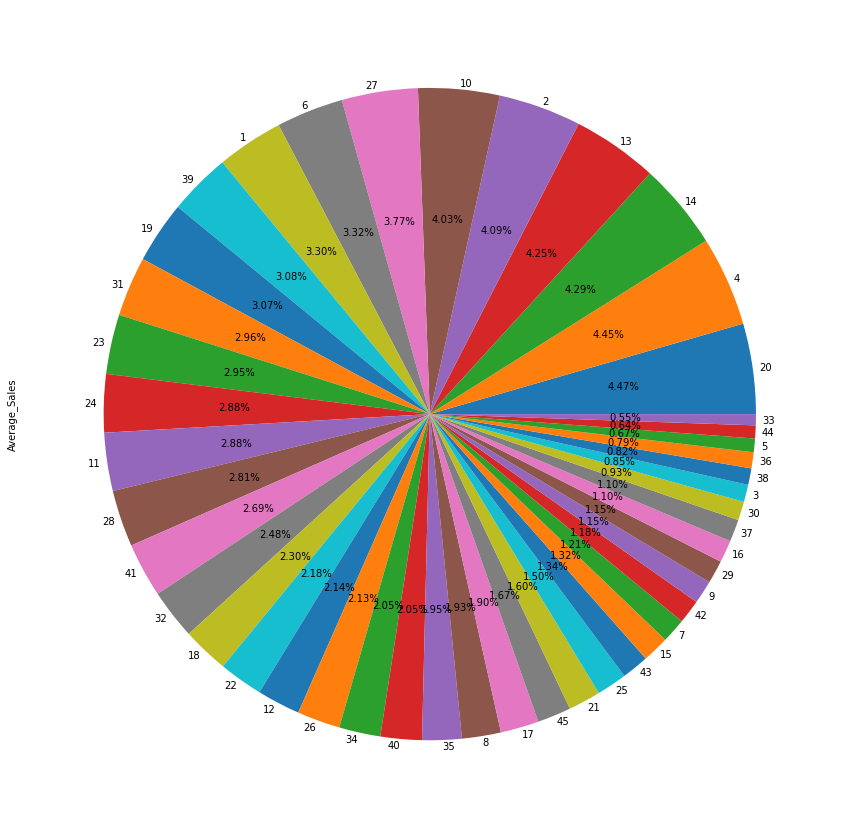

In [44]:
df2.plot(df2.Average_Sales,kind='pie',autopct='%1.2f%%',figsize=(15,15),subplots=True,legend=False,labeldistance=1.02)

Highest average sales is being made by store 20 followed by store 4 and store 14 with not much difference whereas store 33 made least average sales of 259861.7 ..

In [45]:
# Standard deviation of sales per Stores
df3=df_walmart.groupby("Store").std()[['Weekly_Sales']].sort_values("Weekly_Sales",ascending=False)
df3.rename(columns={"Weekly_Sales":"Variation_Sales"},inplace=True)
df3=df3.round(1);print(df3.head(),'\n')#.style.background_gradient()
print(df3.tail())

       Variation_Sales
Store                 
14            317569.9
10            302262.1
20            275900.6
4             266201.4
13            265507.0 

       Variation_Sales
Store                 
5              37738.0
44             24762.8
33             24132.9
30             22809.7
37             21837.5


<AxesSubplot:xlabel='Store'>

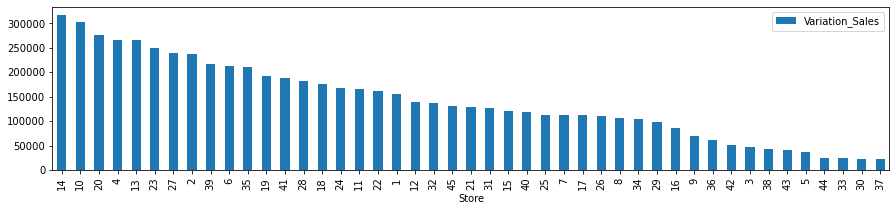

In [46]:
df3.plot(kind='bar',figsize=(15,3))

array([<AxesSubplot:ylabel='Variation_Sales'>], dtype=object)

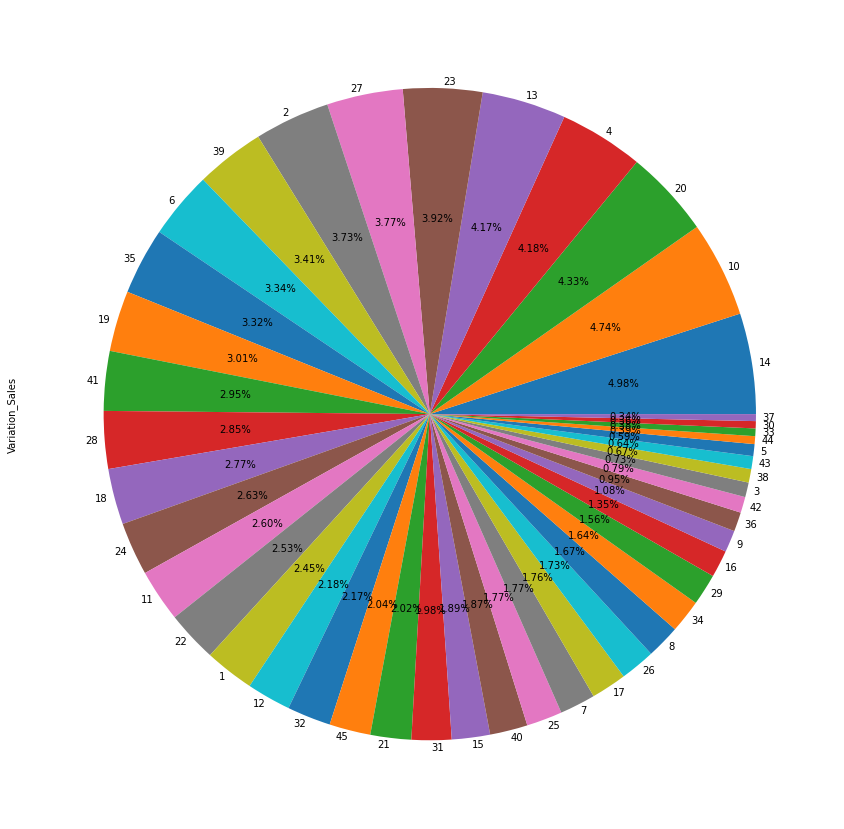

In [47]:
df3.plot(df3.Variation_Sales,kind='pie',autopct='%1.2f%%',figsize=(15,15),subplots=True,legend=False,labeldistance=1.02)

Store 14(shows 4.98% of variation in sales) along with store 10, store 20 shows highest variations in sales made whereas store 37 has least variation in sales although overall collection for store 37 is 74,202,740.3 while average sales is 518,900.3

In [48]:
# Relative standard deviations in sales per Store
df_CV=(df_walmart.groupby("Store").std()[['Weekly_Sales']]/df_walmart.groupby("Store").mean()[['Weekly_Sales']])*100
df_CV=df_CV.round(2) ; df_CV.rename(columns={'Weekly_Sales':"Relative Standard Deviations"},inplace=True)
df_CV.sort_values("Relative Standard Deviations",ascending=True,inplace=True) ; print(df_CV.head(),'\n')#.style.background_gradient(cmap='PuBu')
print(df_CV.tail())

       Relative Standard Deviations
Store                              
37                             4.21
30                             5.20
43                             6.41
44                             8.18
31                             9.02 

       Relative Standard Deviations
Store                              
23                            17.97
29                            18.37
15                            19.34
7                             19.73
35                            22.97


<AxesSubplot:xlabel='Store'>

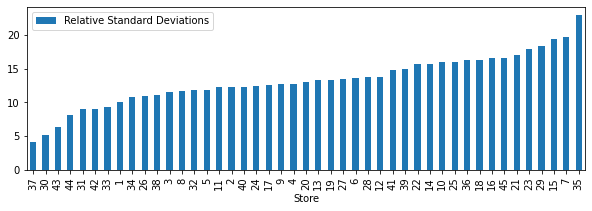

In [49]:
df_CV.plot(kind='bar',figsize=(10,3))

array([<AxesSubplot:ylabel='Relative Standard Deviations'>], dtype=object)

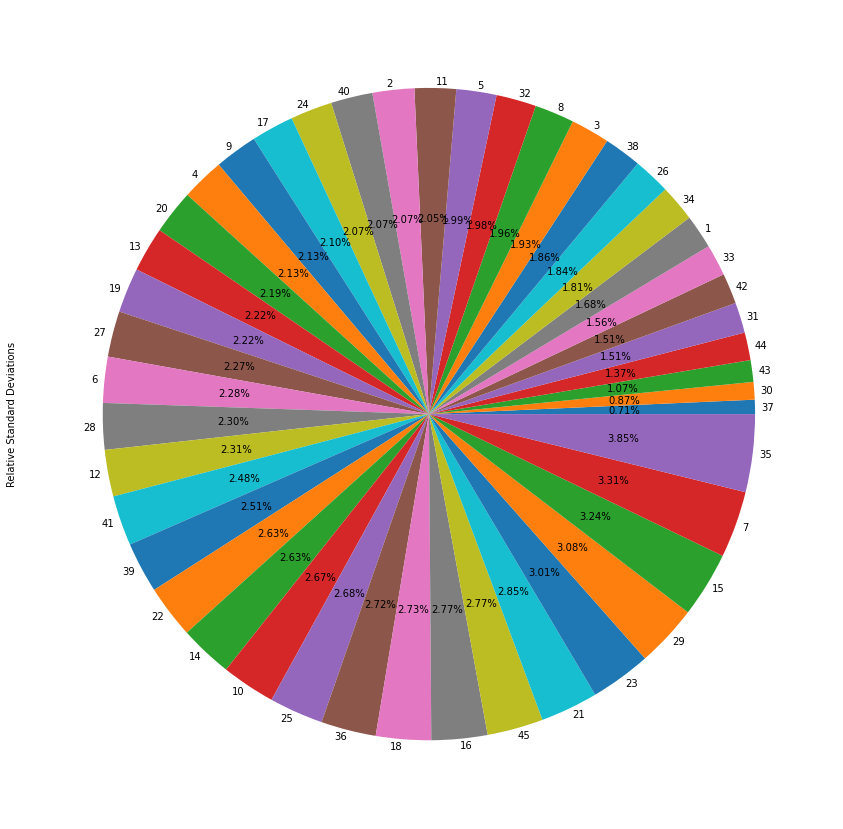

In [50]:
df_CV.plot(df_CV['Relative Standard Deviations'],kind='pie',autopct='%1.2f%%',figsize=(15,15),subplots=True,legend=False,labeldistance=1.02)

In terms of coefficient of variations(standard deviation to mean ratio), store 37(only 0.71% of relative standard deviations) has very good performance as it has least CV value which indicates this store can be considered as reliable if one considers it on the basis of sales made by stores. It is to be noted that lower the CV value, better the variable as the values are more concentrated around mean value rather than spreading far away from mean values. Higher values of CV denotes values are highly spreaded,i.e, there may be chances that some values are near to mean while some are far to very far away from mean but not all the values are concentrated towards the mean... 

In [51]:
# yearwise price summary
df_yearwise_price=df_walmart.groupby("Year").agg(['sum','mean'])[['Weekly_Sales']].sort_values("Year")
df_yearwise_price=df_yearwise_price.round(1);df_yearwise_price#.style.background_gradient(cmap='Blues')

Weekly_Sales           
               sum       mean
Year                         
2010  2.288886e+09  1059669.5
2011  2.448200e+09  1046239.3
2012  2.000133e+09  1033660.4

array([<AxesSubplot:ylabel='(Weekly_Sales, sum)'>,
       <AxesSubplot:ylabel='(Weekly_Sales, mean)'>], dtype=object)

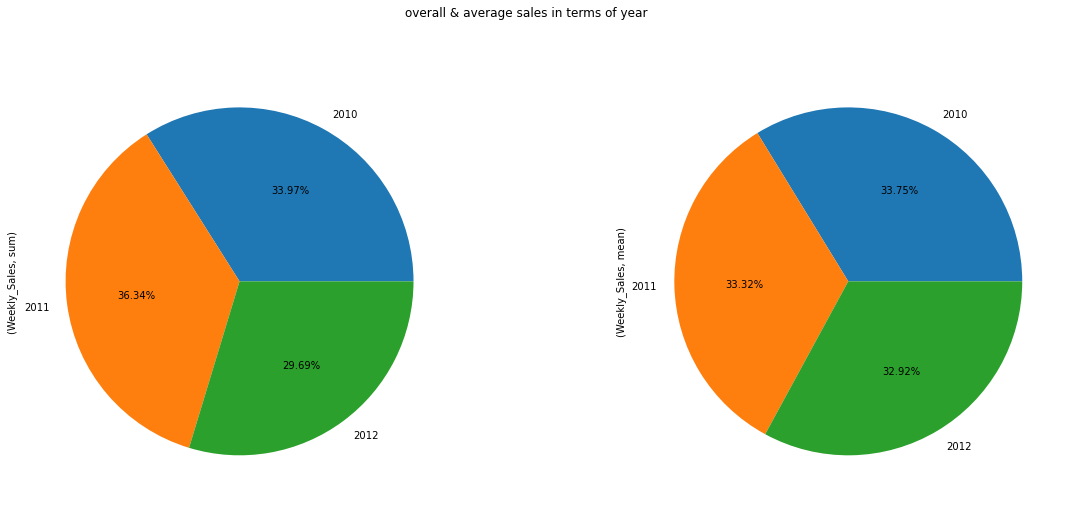

In [52]:
df_yearwise_price.plot(df_yearwise_price,kind='pie',subplots=True,figsize=(20,8),legend=False,autopct='%1.2f%%',fontsize=10,title='overall & average sales in terms of year')

In [53]:
print("\n Max Year value index\n",df_yearwise_price.idxmax()) ; print("\n Min Year value index\n",df_yearwise_price.idxmin())


 Max Year value index
 Weekly_Sales  sum     2011
              mean    2010
dtype: int64

 Min Year value index
 Weekly_Sales  sum     2012
              mean    2012
dtype: int64


Maximum overall sales is made in year 2011 whereas highest average sales is made in 2010.

Minimum overall sales and average sales is made in 2012.

In [54]:
# monthwise price summary
df_monthwise_price=df_walmart.groupby("Month").agg(['sum','mean'])[['Weekly_Sales']].sort_values("Month")
df_monthwise_price=df_monthwise_price.round(1);df_monthwise_price

Weekly_Sales           
               sum       mean
Month                        
1      332598438.5   923884.6
2      568727890.4  1053199.8
3      592785901.3  1013309.2
4      646859785.0  1026761.6
5      557125571.9  1031714.0
6      622629886.8  1064324.6
7      650000977.2  1031747.6
8      613090208.8  1048017.5
9      578761179.3   989335.3
10     584784787.6   999632.1
11     413015725.0  1147265.9
12     576838635.2  1281863.6

array([<AxesSubplot:ylabel='(Weekly_Sales, sum)'>,
       <AxesSubplot:ylabel='(Weekly_Sales, mean)'>], dtype=object)

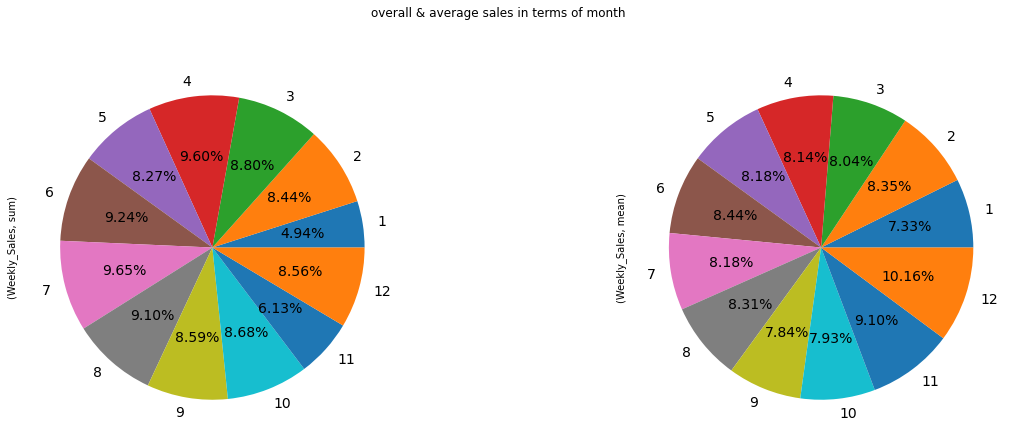

In [55]:
df_monthwise_price.plot(df_monthwise_price,kind='pie',subplots=True,figsize=(20,7),legend=False,autopct='%1.2f%%',fontsize=14,title='overall & average sales in terms of month')

In [56]:
print("\n Max Month value index\n\n",df_monthwise_price.idxmax());print("\n Min Month value index\n",df_monthwise_price.idxmin())


 Max Month value index

 Weekly_Sales  sum      7
              mean    12
dtype: int64

 Min Month value index
 Weekly_Sales  sum     1
              mean    1
dtype: int64


Minimum overall sales and average sales is made in January.

Maximum overall sales is made in month of July while highest average sales is made in December.

In [57]:
# daywise price summary
df_daywise_price=df_walmart.groupby("Day").agg(['sum','mean'])[['Weekly_Sales']].sort_values("Day")
df_daywise_price=df_daywise_price.round(1);df_daywise_price

Weekly_Sales           
             sum       mean
Day                        
1    181559036.3  1008661.3
2    240969530.5  1070975.7
3    239446787.3  1064207.9
4    239102000.2  1062675.6
5    237986299.0  1057716.9
6    244777717.1  1087901.0
7    186820779.0  1037893.2
8    188500876.6  1047227.1
9    245069649.2  1089198.4
10   246383761.9  1095038.9
11   235190162.6  1045289.6
12   232764958.4  1034510.9
13   226662635.2  1007389.5
14   174604617.2   970025.7
15   182050842.2  1011393.6
16   242208727.6  1076483.2
17   249900597.1  1110669.3
18   234473456.1  1042104.2
19   230431310.8  1024139.2
20   224320620.7   996980.5
21   175948256.6   977490.3
22   184686057.9  1026033.7
23   254333434.2  1130370.8
24   261392854.8  1161746.0
25   248097163.9  1102654.1
26   246884600.2  1097264.9
27   218852126.0   972676.1
28   176948076.0   983044.9
29   177413250.1   985629.2
30   221846644.0   985985.1
31    87592158.4   973246.2

array([<AxesSubplot:ylabel='(Weekly_Sales, sum)'>,
       <AxesSubplot:ylabel='(Weekly_Sales, mean)'>], dtype=object)

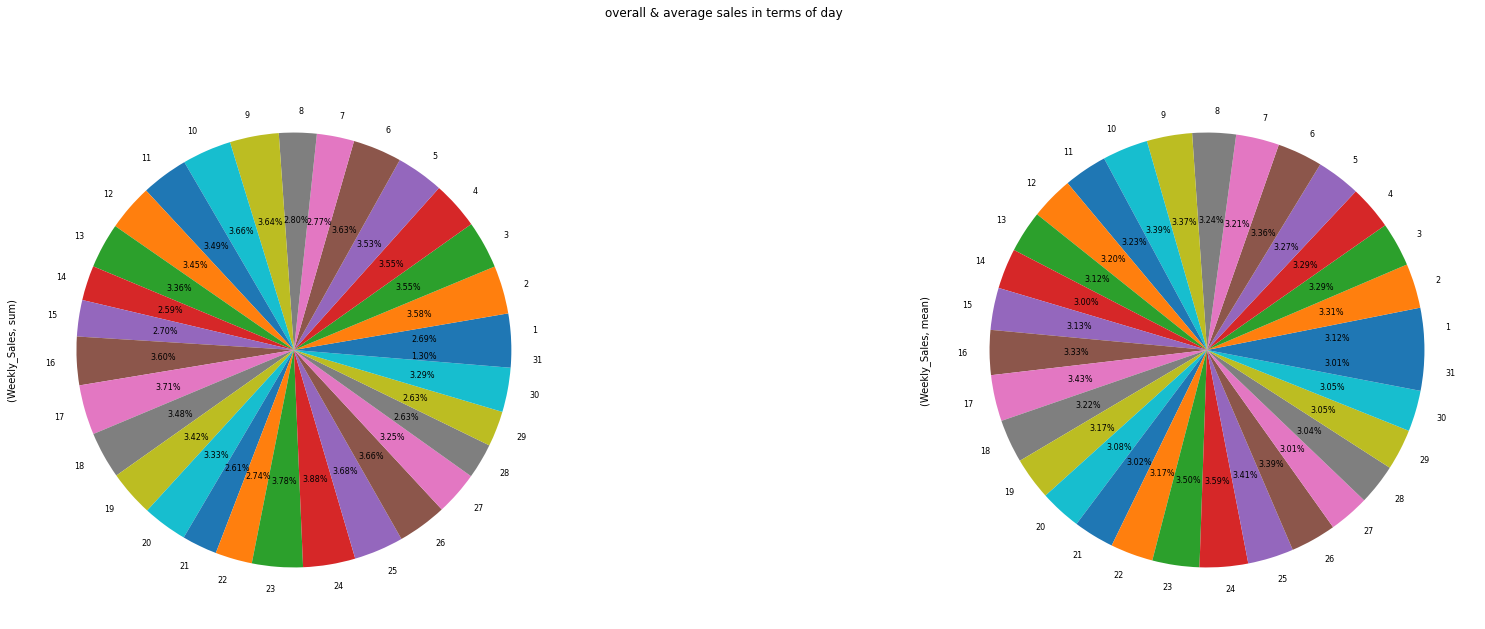

In [58]:
df_daywise_price.plot(df_daywise_price,kind='pie',subplots=True,figsize=(30,10),legend=False,autopct='%1.2f%%',fontsize=8,title='overall & average sales in terms of day')

In [59]:
print("\n Max Day value index\n\n",df_daywise_price.idxmax());print("\n Min Day value index\n",df_daywise_price.idxmin())


 Max Day value index

 Weekly_Sales  sum     24
              mean    24
dtype: int64

 Min Day value index
 Weekly_Sales  sum     31
              mean    14
dtype: int64


Irrespective of any particular year, month, quarter, store or any other factor, highest overall sales and highest average sales is made on date of 24 whereas lowest sales is made on 31 whereas lowest average sales is made on the date of 14.

In [60]:
# quarterwise price summary
df_quarterwise_price=df_walmart.groupby("Quarter").agg({'Weekly_Sales':['sum','mean']}).sort_values("Quarter")
df_quarterwise_price=df_quarterwise_price.round(1);df_quarterwise_price

Weekly_Sales           
                  sum       mean
Quarter                         
1        1.494112e+09  1006136.2
2        1.826615e+09  1040806.4
3        1.841852e+09  1023251.3
4        1.574639e+09  1128773.6

array([<AxesSubplot:ylabel='(Weekly_Sales, sum)'>,
       <AxesSubplot:ylabel='(Weekly_Sales, mean)'>], dtype=object)

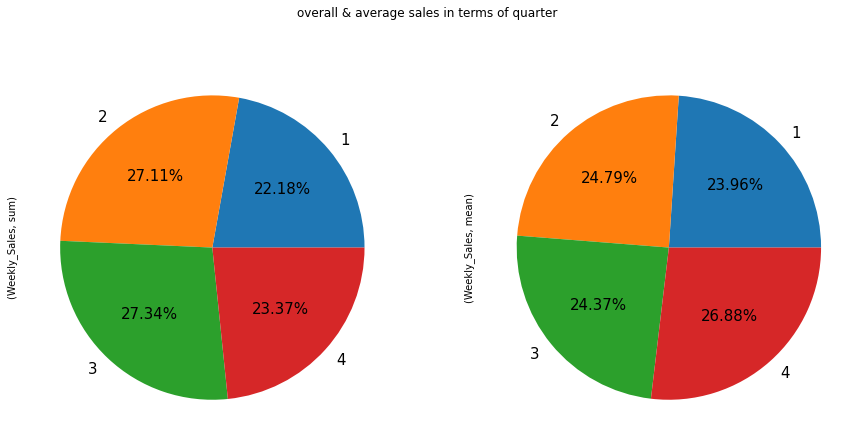

In [61]:
df_quarterwise_price.plot(df_quarterwise_price,kind='pie',subplots=True,figsize=(15,7),legend=False,autopct='%1.2f%%',fontsize=15,title='overall & average sales in terms of quarter')

In [62]:
print("\n Max Quarter value index\n\n",df_quarterwise_price.idxmax());print("\n Min Quarter value index\n",df_quarterwise_price.idxmin())


 Max Quarter value index

 Weekly_Sales  sum     3
              mean    4
dtype: int64

 Min Quarter value index
 Weekly_Sales  sum     1
              mean    1
dtype: int64


In terms of quarter, highest sales is made for 3rd quarter while lowest sales is made in 1st quarter. Highest average sales is made in 4th quarter while lowest average is made in 1st quarter.

In [63]:
# Overall sales in holiday and non holiday season
df_holidaywise_price=df_walmart.groupby("Holiday_Flag").agg(['sum','mean'])[['Weekly_Sales']]
df_holidaywise_price

Weekly_Sales              
                       sum          mean
Holiday_Flag                            
0             6.231919e+09  1.041256e+06
1             5.052996e+08  1.122888e+06

In [64]:
print("\n Max Holiday_Flag index\n\n",df_holidaywise_price.idxmax())


 Max Holiday_Flag index

 Weekly_Sales  sum     0
              mean    1
dtype: int64


Irrespective of any other factors, highest overall sales is made in non holiday season while average sales is made highest in holiday season.

In [65]:
# Sales with respect to Store and holiday
df_store_holidaywise_price=df_walmart.groupby(['Store','Holiday_Flag']).agg(['sum','mean'])[['Weekly_Sales']].sort_values([("Weekly_Sales",'sum')],ascending=False)
df_store_holidaywise_price=df_store_holidaywise_price.round(1);df_store_holidaywise_price

Weekly_Sales           
                            sum       mean
Store Holiday_Flag                        
20    0             278907441.6  2097048.4
4     0             277112927.1  2083555.8
14    0             267794081.4  2013489.3
13    0             265387265.7  1995393.0
2     0             254589772.0  1914208.8
...                         ...        ...
38    1               3815098.8   381509.9
36    1               3676406.3   367640.6
5     1               3595016.1   359501.6
44    1               2960356.0   296035.6
33    1               2625945.2   262594.5

[90 rows x 2 columns]

In [66]:
print("\n Min value(Store,holiday) index\n",df_store_holidaywise_price.idxmin(),'\n\n')
print(df_store_holidaywise_price.min())


 Min value(Store,holiday) index
 Weekly_Sales  sum     (33, 1)
              mean    (33, 0)
dtype: object 


Weekly_Sales  sum     2625945.2
              mean     259656.2
dtype: float64


In [67]:
print("\n Max value(Store, holiday) index\n\n",df_store_holidaywise_price.idxmax(),'\n\n')
print(df_store_holidaywise_price.max())


 Max value(Store, holiday) index

 Weekly_Sales  sum     (20, 0)
              mean    (20, 1)
dtype: object 


Weekly_Sales  sum     278907441.6
              mean      2249035.1
dtype: float64


With respect to store and holiday seasons, it is observed that maximum overall sales as well as average sales, both were made by store 20,however, overall sales is made highest in non holiday season while maximum average sales is made in holiday season.

On other side, we get minimum sales and minimum average sales both for same store, store 33, but for different holiday flag values.

In [68]:
# Sales with respect to Store and year
df_store_yearwise_price=df_walmart.groupby(['Store','Year']).agg(['sum','mean'])[['Weekly_Sales']].sort_values(("Weekly_Sales",'sum'),ascending=False)
df_store_yearwise_price=df_store_yearwise_price.round(1);df_store_yearwise_price

Weekly_Sales           
                    sum       mean
Store Year                        
4     2011  111092293.3  2136390.3
20    2011  109837002.4  2112250.0
14    2011  106096270.7  2040312.9
      2010  105462242.4  2197130.0
13    2011  104537513.3  2010336.8
...                 ...        ...
44    2010   13607519.4   283490.0
36    2012   13286470.5   308987.7
33    2011   12957836.7   249189.2
      2010   12766834.3   265975.7
      2012   11435551.0   265943.0

[135 rows x 2 columns]

In [69]:
print("\n Min value(Store,year) index\n",df_store_yearwise_price.idxmin(),'\n\n')
print(df_store_yearwise_price.min())


 Min value(Store,year) index
 Weekly_Sales  sum     (33, 2012)
              mean    (33, 2011)
dtype: object 


Weekly_Sales  sum     11435551.0
              mean      249189.2
dtype: float64


In [70]:
print("\n Max value(Store,year) index\n",df_store_yearwise_price.idxmax(),'\n\n')
print(df_store_yearwise_price.max())


 Max value(Store,year) index
 Weekly_Sales  sum      (4, 2011)
              mean    (14, 2010)
dtype: object 


Weekly_Sales  sum     111092293.3
              mean      2197130.0
dtype: float64


If we take into consideration store and year values only, then highest sales is made by store 14 in year 2011 and highest average sales is for store 4 for year 2010.

While lowest values for both overall and average sales is observed for store 33 in 2012 and in 2011 respectively.

In [71]:
# Sales with respect to Store, year and month
df_store_yearmonth_price=df_walmart.groupby(['Store','Year','Month']).agg(['sum','mean'])[['Weekly_Sales']].sort_values(("Weekly_Sales",'sum'),ascending=False)
df_store_yearmonth_price=df_store_yearmonth_price.round(1);df_store_yearmonth_price

Weekly_Sales           
                          sum       mean
Store Year Month                        
20    2010 12      13553791.6  2710758.3
      2011 12      13206333.3  2641266.7
4     2011 12      13144846.5  2628969.3
14    2010 12      13064273.2  2612854.6
10    2010 12      12930999.5  2586199.9
...                       ...        ...
33    2010 9         988494.7   247123.7
           11        983612.9   245903.2
           8         982708.1   245677.0
      2011 1         979488.9   244872.2
           6         978510.6   244627.7

[1485 rows x 2 columns]

In [72]:
print("\n Min value(Store,year,month) index\n",df_store_yearmonth_price.idxmin(),'\n\n')
print(df_store_yearmonth_price.min())


 Min value(Store,year,month) index
 Weekly_Sales  sum      (33, 2011, 6)
              mean    (33, 2010, 12)
dtype: object 


Weekly_Sales  sum     978510.6
              mean    234192.7
dtype: float64


In [73]:
print("\n Max value(Store,year,month) index\n",df_store_yearmonth_price.idxmax(),'\n\n')
print(df_store_yearmonth_price.max())


 Max value(Store,year,month) index
 Weekly_Sales  sum     (20, 2010, 12)
              mean    (20, 2010, 12)
dtype: object 


Weekly_Sales  sum     13553791.6
              mean     2710758.3
dtype: float64


If we go down more specifically towards month, we get higher values for overall sales as well as average sales with store 20 in December 2012.

whereas minimum sales as well as average sales is observed for store 33 but in different years(June 2011, December 2010).

In [74]:
# Sales with respect to Store, year, month and holiday season
df_store_yearmonth_holiday_price=df_walmart.groupby(['Store','Year','Month','Holiday_Flag']).agg(['sum','mean'])[['Weekly_Sales']].sort_values(("Weekly_Sales",'sum'),ascending=False)
df_store_yearmonth_holiday_price=df_store_yearmonth_holiday_price.round(1);df_store_yearmonth_holiday_price

Weekly_Sales           
                                       sum       mean
Store Year Month Holiday_Flag                        
20    2010 12    0              11754053.8  2938513.5
14    2010 12    0              11440556.8  2860139.2
10    2010 12    0              11223701.4  2805925.3
20    2011 12    0              11163088.3  2790772.1
4     2011 12    0              11137740.6  2784435.2
...                                    ...        ...
33    2011 11    1                255996.5   255996.5
44    2010 12    1                241937.1   241937.1
33    2010 11    1                240044.6   240044.6
           12    1                219804.8   219804.8
      2011 12    1                215359.2   215359.2

[1935 rows x 2 columns]

In [75]:
print("\n Min value(Store,year,month,holiday) index\n",df_store_yearmonth_holiday_price.idxmin(),'\n\n')
print(df_store_yearmonth_holiday_price.min())


 Min value(Store,year,month,holiday) index
 Weekly_Sales  sum     (33, 2011, 12, 1)
              mean    (33, 2011, 12, 1)
dtype: object 


Weekly_Sales  sum     215359.2
              mean    215359.2
dtype: float64


In [76]:
print("\n Max value(Store,year,month,holiday) index\n",df_store_yearmonth_holiday_price.idxmax(),'\n\n')
print(df_store_yearmonth_holiday_price.max())


 Max value(Store,year,month,holiday) index
 Weekly_Sales  sum     (20, 2010, 12, 0)
              mean     (4, 2011, 11, 1)
dtype: object 


Weekly_Sales  sum     11754053.8
              mean     3004702.3
dtype: float64


With considering holiday seasons, highest sales is made by store 20 and average sales is made by store 4, but overall sales is highest for non holiday season whereas average sales is highest for holiday season while lowest values for sales and averages is observed for store 33 and for holiday season.

##### Quaterly growth in year 2012 

In [77]:
df_quarter4_2011=df_walmart[(df_walmart['Quarter']==4) & (df_walmart['Year']==2011)]
df_quarter4_2011=df_quarter4_2011.groupby(["Store"]).sum()[["Weekly_Sales"]].sort_values("Weekly_Sales",ascending=False)
df_quarter4_2011=df_quarter4_2011.rename(columns={"Weekly_Sales":"overall_sales_Q4_2011"})
print(df_quarter4_2011.head(),'\n')
print(df_quarter4_2011.tail())

       overall_sales_Q4_2011
Store                       
4                31478429.92
20               31152336.70
13               29747837.83
14               29437064.94
10               28282114.59 

       overall_sales_Q4_2011
Store                       
38                5278323.56
5                 4621113.65
36                4190482.01
44                3996841.12
33                3236584.78


In [78]:
df_quarter1_2012=df_walmart[(df_walmart['Quarter']==1) & (df_walmart['Year']==2012)]
df_quarter1_2012=df_quarter1_2012.groupby(["Store"]).sum()[["Weekly_Sales"]].sort_values("Weekly_Sales",ascending=False)
df_quarter1_2012=df_quarter1_2012.rename(columns={"Weekly_Sales":"overall_sales_Q1_2012"})
print(df_quarter1_2012.head(),'\n')
print(df_quarter1_2012.tail())

       overall_sales_Q1_2012
Store                       
4                27930310.30
20               26971607.79
13               25182790.59
2                24528220.70
10               24488944.65 

       overall_sales_Q1_2012
Store                       
3                 5421809.72
5                 4237380.83
36                4165563.14
44                4109696.37
33                3387560.76


In [79]:
df_quarter2_2012=df_walmart[(df_walmart['Quarter']==2) & (df_walmart['Year']==2012)]
df_quarter2_2012=df_quarter2_2012.groupby(["Store"]).sum()[["Weekly_Sales"]].sort_values("Weekly_Sales",ascending=False)
df_quarter2_2012=df_quarter2_2012.rename(columns={"Weekly_Sales":"overall_sales_Q2_2012"})
print(df_quarter2_2012.head(),'\n')
print(df_quarter2_2012.tail())

       overall_sales_Q2_2012
Store                       
4                28454363.67
20               27524197.32
13               27009207.14
14               25155535.41
2                25083604.88 

       overall_sales_Q2_2012
Store                       
3                 5620316.49
5                 4466363.69
44                4306405.78
36                4151991.58
33                3549000.39


In [80]:
df_quarter3_2012=df_walmart[(df_walmart['Quarter']==3) & (df_walmart['Year']==2012)]
df_quarter3_2012=df_quarter3_2012.groupby(["Store"]).sum()[["Weekly_Sales"]].sort_values("Weekly_Sales",ascending=False)
df_quarter3_2012=df_quarter3_2012.rename(columns={"Weekly_Sales":"overall_sales_Q3_2012"})
print(df_quarter3_2012.head(),'\n')
print(df_quarter3_2012.tail())

       overall_sales_Q3_2012
Store                       
4                27796792.46
20               26891526.98
13               26421259.30
2                24303354.86
10               23037258.76 

       overall_sales_Q3_2012
Store                       
3                 5298005.47
44                4411251.16
5                 4163790.99
36                3831691.64
33                3433620.36


In [81]:
df_quarter4_2012=df_walmart[(df_walmart['Quarter']==4) & (df_walmart['Year']==2012)]
df_quarter4_2012=df_quarter4_2012.groupby(["Store"]).sum()[["Weekly_Sales"]].sort_values("Weekly_Sales",ascending=False)
df_quarter4_2012=df_quarter4_2012.rename(columns={"Weekly_Sales":"overall_sales_Q4_2012"})
print(df_quarter4_2012.head(),'\n')
print(df_quarter4_2012.tail())

       overall_sales_Q4_2012
Store                       
4                 8589722.81
20                8440377.29
13                8094197.99
2                 7581514.93
10                6952044.36 

       overall_sales_Q4_2012
Store                       
3                 1684307.82
44                1360020.41
5                 1301302.62
36                1137224.17
33                1065369.52


<AxesSubplot:xlabel='Store'>

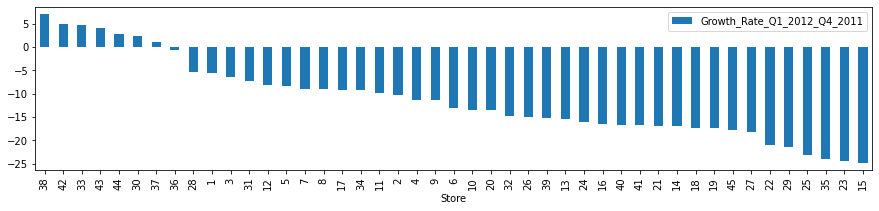

In [82]:
# Growth rate for Q1

df_growth_store_2012_Q1=((df_quarter1_2012['overall_sales_Q1_2012']-df_quarter4_2011['overall_sales_Q4_2011'])/df_quarter4_2011['overall_sales_Q4_2011'])*100
df_growth_store_2012_Q1=df_growth_store_2012_Q1.round(2)
df_growth_store_2012_Q1=df_growth_store_2012_Q1.to_frame().rename(columns={0:"Growth_Rate_Q1_2012_Q4_2011"})
df_growth_store_2012_Q1.sort_values('Growth_Rate_Q1_2012_Q4_2011',ascending=False).plot(kind='bar',figsize=(15,3))

<AxesSubplot:xlabel='Store'>

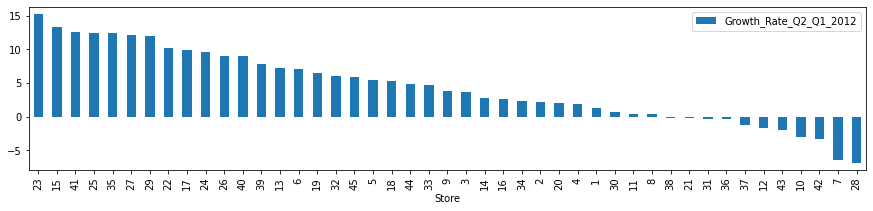

In [83]:
# Growth rate for Q2

df_growth_store_2012_Q2=((df_quarter2_2012['overall_sales_Q2_2012']-df_quarter1_2012['overall_sales_Q1_2012'])/df_quarter1_2012['overall_sales_Q1_2012'])*100
df_growth_store_2012_Q2=df_growth_store_2012_Q2.round(2)
df_growth_store_2012_Q2=df_growth_store_2012_Q2.to_frame().rename(columns={0:"Growth_Rate_Q2_Q1_2012"})
df_growth_store_2012_Q2.sort_values('Growth_Rate_Q2_Q1_2012',ascending=False).plot(kind='bar',figsize=(15,3))

<AxesSubplot:xlabel='Store'>

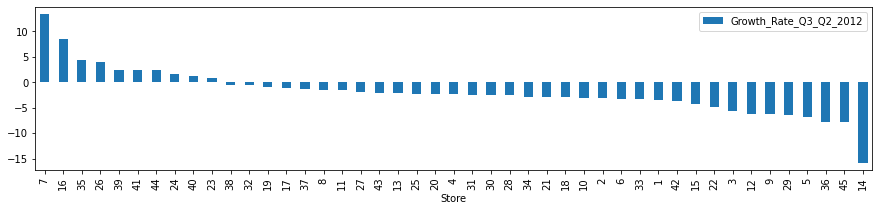

In [84]:
# Growth rate for Q3

df_growth_store_2012_Q3=((df_quarter3_2012['overall_sales_Q3_2012']-df_quarter2_2012['overall_sales_Q2_2012'])/df_quarter2_2012['overall_sales_Q2_2012'])*100
df_growth_store_2012_Q3=df_growth_store_2012_Q3.round(2)
df_growth_store_2012_Q3=df_growth_store_2012_Q3.to_frame().rename(columns={0:"Growth_Rate_Q3_Q2_2012"})
df_growth_store_2012_Q3.sort_values('Growth_Rate_Q3_Q2_2012',ascending=False).plot(kind='bar',figsize=(15,3))

<AxesSubplot:xlabel='Store'>

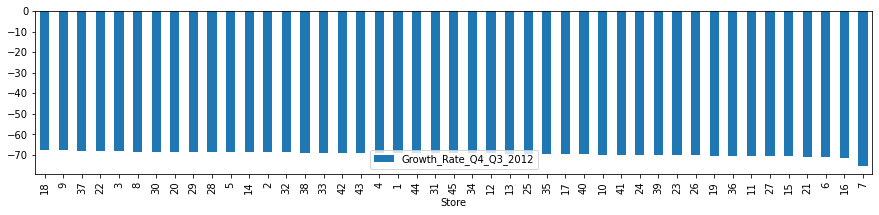

In [85]:
# Growth rate for Q4

df_growth_store_2012_Q4=((df_quarter4_2012['overall_sales_Q4_2012']-df_quarter3_2012['overall_sales_Q3_2012'])/df_quarter3_2012['overall_sales_Q3_2012'])*100
df_growth_store_2012_Q4=df_growth_store_2012_Q4.round(2)
df_growth_store_2012_Q4=df_growth_store_2012_Q4.to_frame().rename(columns={0:"Growth_Rate_Q4_Q3_2012"})
df_growth_store_2012_Q4.sort_values('Growth_Rate_Q4_Q3_2012',ascending=False).plot(kind='bar',figsize=(15,3))

From above bar charts, it is observed that for year 2012, good performance in terms of sales is reflected by quarter 2 followed by quarter 3 and quarter 1 but worst for quarter 4.
The growth rate for quarter 2 may be due to any of the factors like- the season for quarter 2 generally consist of spring season. not too hot, not too cold.etc

The performance of quarter 4 can be due to fact that it comprises of winters which may affect the demographic locations from moderate to severe or some other reasons.

## Semester-wise sales summary 

In [86]:
df_sem_1=df_walmart[(df_walmart["Quarter"]==1) | (df_walmart["Quarter"]==2)]
df_sem_1_sales=df_sem_1[['Month',"Weekly_Sales"]]
df_sem_1_sales=df_sem_1_sales.groupby("Month").agg(['sum','mean'])[["Weekly_Sales"]].round(1)
df_sem_1_sales

Weekly_Sales           
               sum       mean
Month                        
1      332598438.5   923884.6
2      568727890.4  1053199.8
3      592785901.3  1013309.2
4      646859785.0  1026761.6
5      557125571.9  1031714.0
6      622629886.8  1064324.6

array([<AxesSubplot:ylabel='(Weekly_Sales, sum)'>,
       <AxesSubplot:ylabel='(Weekly_Sales, mean)'>], dtype=object)

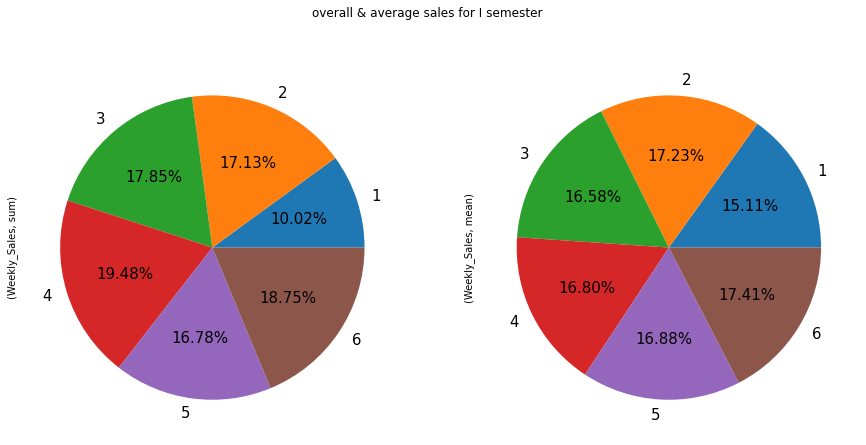

In [87]:
df_sem_1_sales.plot(df_sem_1_sales,kind='pie',subplots=True,figsize=(15,7),legend=False,autopct='%1.2f%%',fontsize=15,title='overall & average sales for I semester')

In [88]:
df_sem_2=df_walmart[(df_walmart["Quarter"]==3) | (df_walmart["Quarter"]==4)]
df_sem_2_sales=df_sem_2[['Month',"Weekly_Sales"]]
df_sem_2_sales=df_sem_2_sales.groupby("Month").agg(['sum','mean'])[["Weekly_Sales"]].round(1)
df_sem_2_sales

Weekly_Sales           
               sum       mean
Month                        
7      650000977.2  1031747.6
8      613090208.8  1048017.5
9      578761179.3   989335.3
10     584784787.6   999632.1
11     413015725.0  1147265.9
12     576838635.2  1281863.6

array([<AxesSubplot:ylabel='(Weekly_Sales, sum)'>,
       <AxesSubplot:ylabel='(Weekly_Sales, mean)'>], dtype=object)

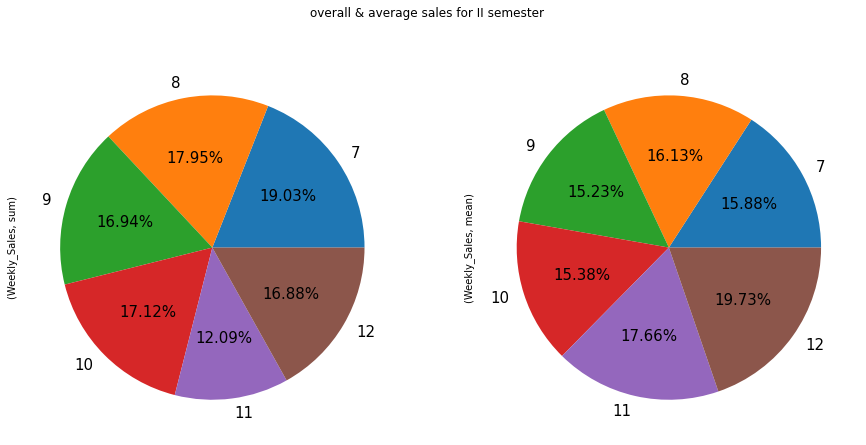

In [89]:
df_sem_2_sales.plot(df_sem_2_sales,kind='pie',subplots=True,figsize=(15,7),legend=False,autopct='%1.2f%%',fontsize=15,title='overall & average sales for II semester')

## List of those holidays that made sales  greater than average sales in non holiday seasons 

In [90]:
avg_nonholiday_sales1=df_walmart[df_walmart.Holiday_Flag==0].mean()[['Weekly_Sales']]
avg_nonholiday_sales1

Weekly_Sales    1.041256e+06
dtype: float64

In [91]:
def higher_sales(x):
    if x > avg_nonholiday_sales1[0]:
        return True
    else:
        return False

In [92]:
# Get the holiday weeks which have higher sales than the non-holiday weeks
holidays_week_of_higher_sales = df_walmart[df_walmart.Holiday_Flag == 1].loc[df_walmart.Weekly_Sales.apply(higher_sales)]
holidays_week_of_higher_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date1,Year,Month,Day,Quarter
1,1,2,1641957.44,1,38.51,2.55,211.24,8.11,2010-02-12,2010,2,12,1
31,1,32,1507460.69,1,78.69,2.56,211.50,7.79,2010-09-10,2010,9,10,3
42,1,43,1955624.11,1,64.52,2.74,211.75,7.84,2010-11-26,2010,11,26,4
47,1,48,1367320.01,1,48.43,2.94,211.40,7.84,2010-12-31,2010,12,31,4
53,1,54,1649614.93,1,36.39,3.02,212.94,7.74,2011-02-11,2011,2,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,41,100,1264014.16,1,34.12,3.12,196.36,6.76,2011-12-30,2011,12,30,4
5825,41,106,1238844.56,1,22.00,3.10,196.92,6.59,2012-02-10,2012,2,10,1
5855,41,136,1392143.82,1,67.41,3.60,198.10,6.43,2012-09-07,2012,9,7,3
6334,45,43,1182500.16,1,46.15,3.04,182.78,8.72,2010-11-26,2010,11,26,4


In [93]:
holidays_week_of_higher_sales.set_index("Store",inplace=True)
holidays_week_of_higher_sales

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date1,Year,Month,Day,Quarter
Store,,,,,,,,,,,,
1,2,1641957.44,1,38.51,2.55,211.24,8.11,2010-02-12,2010,2,12,1
1,32,1507460.69,1,78.69,2.56,211.50,7.79,2010-09-10,2010,9,10,3
1,43,1955624.11,1,64.52,2.74,211.75,7.84,2010-11-26,2010,11,26,4
1,48,1367320.01,1,48.43,2.94,211.40,7.84,2010-12-31,2010,12,31,4
1,54,1649614.93,1,36.39,3.02,212.94,7.74,2011-02-11,2011,2,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...
41,100,1264014.16,1,34.12,3.12,196.36,6.76,2011-12-30,2011,12,30,4
41,106,1238844.56,1,22.00,3.10,196.92,6.59,2012-02-10,2012,2,10,1
41,136,1392143.82,1,67.41,3.60,198.10,6.43,2012-09-07,2012,9,7,3


In [94]:
holidays_week_of_higher_sales[['Date1']].sort_values(['Store',"Date1"],ascending=[True,True])

,Date1
Store,
1,2010-02-12
1,2010-09-10
1,2010-11-26
1,2010-12-31
1,2011-02-11
...,...
41,2011-12-30
41,2012-02-10
41,2012-09-07


In [95]:
q=holidays_week_of_higher_sales.Date1.unique()
q

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

There are 220 instances where the sales made in holiday season for a particular store is greater than average sales made in non holiday season for same stores.
In terms of uniqueness, we have 10 dates that contribute to above purpose
    
    12 feb 2010
    10 sept 2010
    26 nov 2010
    31 dec 2010
    
    11 feb 2011
    9 sept 2011
    25 nov 2011
    30 dec 2011
    
    10 feb 2012
    7 sept 2012

# Model building (Regression Models)

In [96]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *

from sklearn.model_selection import train_test_split

In [97]:
import warnings
warnings.filterwarnings('ignore')

In [98]:
# To get Store and Holida_Flag as categorical variable(dummy variables)
#df=pd.get_dummies(df,columns=['Store','Holiday_Flag'],drop_first=True) # first column is dropped to reduce the multicollinearity

In [99]:
df_walmart1=pd.get_dummies(df_walmart1,columns=['Store','Holiday_Flag'],drop_first=True)

In [100]:
# Log2 transforming the Weekly_Sales to avoid any inconsistencies due to scale differences
#df['Weekly_Sales']=np.log2(df['Weekly_Sales']); df['Weekly_Sales']=round(df['Weekly_Sales'],2)

df_walmart1['Weekly_Sales']=np.log(df_walmart1['Weekly_Sales']); df_walmart1['Weekly_Sales']=round(df_walmart1['Weekly_Sales'],2)
df_walmart1['CPI']=np.sqrt(df_walmart1['CPI']); df_walmart1['CPI']=round(df_walmart1['CPI'],2)


df_walmart1.head()

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Date1,Year,Month,Day,...,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_1
0,1,14.31,42.31,2.57,14.53,8.11,2010-02-05,2010,2,5,...,0,0,0,0,0,0,0,0,0,0
1,2,14.31,38.51,2.55,14.53,8.11,2010-02-12,2010,2,12,...,0,0,0,0,0,0,0,0,0,1
2,3,14.29,39.93,2.51,14.54,8.11,2010-02-19,2010,2,19,...,0,0,0,0,0,0,0,0,0,0
3,4,14.16,46.63,2.56,14.54,8.11,2010-02-26,2010,2,26,...,0,0,0,0,0,0,0,0,0,0
4,5,14.26,46.50,2.62,14.54,8.11,2010-03-05,2010,3,5,...,0,0,0,0,0,0,0,0,0,0


In [101]:
df_walmart1.isnull().any().sum()

0

The need for dummy variables here is to increase the numbers of features that can be provided to models, otherwise, the results (in terms of training and testing accuracy) can be poor to worst possible with lesser features available.

# Hypothesis Test 

### Check if there is any significant effect on Weekly_Sales due to Fuel_Price, CPI, Unemployment(whether individually or their interactions) 

#### H0 = There is no significant impact on Weekly Sales
#### H1 = there is significant impact on Weekly Sales

#### level of significance(alpha-value) =0.05 (5%)

In [102]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm


formula = 'Weekly_Sales ~ Fuel_Price*CPI*Unemployment'
model = ols(formula, df_walmart1).fit()
aov_table = anova_lm(model, typ=2)

aov_table.style.background_gradient(cmap='Greens')

,sum_sq,df,F,PR(>F)
Fuel_Price,0.299830,1.000000,0.902343,0.342190
CPI,21.581278,1.000000,64.949120,0.000000
Fuel_Price:CPI,10.162338,1.000000,30.583681,0.000000
Unemployment,22.434553,1.000000,67.517062,0.000000
Fuel_Price:Unemployment,1.223831,1.000000,3.683135,0.055010
CPI:Unemployment,40.563641,1.000000,122.076777,0.000000
Fuel_Price:CPI:Unemployment,1.419578,1.000000,4.272239,0.038780
Residual,2135.561985,6427.000000,nan,nan


### By saying there is significant impact, we are rejecting H0 (because p-value is less than level of significance we set)

#### Individually CPI and Unemployment have significant impact on Weekly Sales

#### However, in terms of interaction, interaction of (Fuel_Price:CPI) and (CPI:Unemployment) have significant impact on Weekly Sales 

#### Also Fuel_Price, CPI, Unemployment taken together is having significant impact on Weekly Sales

In [103]:
# X=df.drop(["Weekly_Sales"],axis=1)
# Y=df[['Weekly_Sales']]


X1=df_walmart1.drop(["Weekly_Sales",'Date1','Date'],axis=1) 
Y1=df_walmart1[['Weekly_Sales']]

In [104]:
X1.head()

,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Quarter,Store_2,Store_3,...,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_1
0,42.31,2.57,14.53,8.11,2010,2,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.51,2.55,14.53,8.11,2010,2,12,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,39.93,2.51,14.54,8.11,2010,2,19,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,46.63,2.56,14.54,8.11,2010,2,26,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46.50,2.62,14.54,8.11,2010,3,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
Y1.head()

,Weekly_Sales
0,14.31
1,14.31
2,14.29
3,14.16
4,14.26


In [106]:
x_train, x_test, y_train, y_test = train_test_split(X1,Y1, test_size = 0.3, random_state = 0)

### Bringing down all independent variables to same scale 

In [107]:
from sklearn.preprocessing import RobustScaler,StandardScaler # RobustScaler is used in case when we do not treat outliers and scale the data based on median and IQR.

sc=StandardScaler()
x_train_sc=pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
x_test_sc=pd.DataFrame(sc.transform(x_test),columns=x_test.columns)

In [108]:
x_test_sc.head(1)

,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Quarter,Store_2,Store_3,...,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_1
0,0.353532,0.957968,-1.077722,2.190604,0.034474,1.102081,-0.188359,1.419534,-0.150687,-0.155248,...,-0.154496,-0.151456,-0.154496,-0.151456,-0.147576,-0.146788,-0.152221,-0.154496,-0.148359,-0.274221


# Linear Regression Model 

In [109]:
lr=LinearRegression(normalize=True)
lr.fit(x_train_sc,y_train)

LinearRegression(normalize=True)

In [110]:
y_pred=lr.predict(x_test_sc)

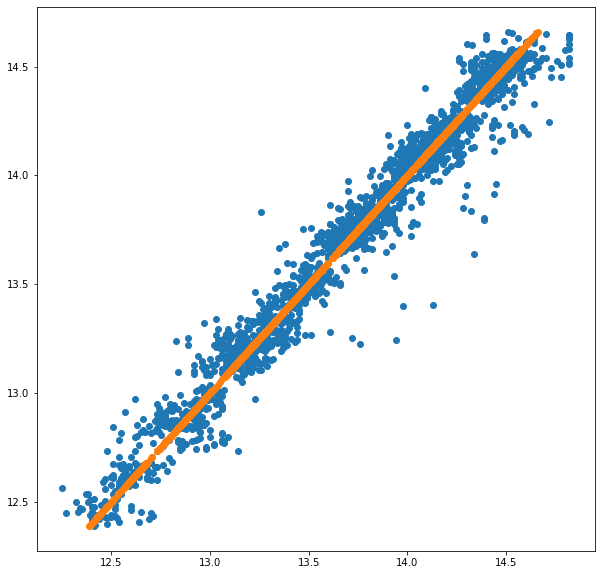

In [111]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred)
plt.scatter(y_pred,y_pred)
plt.show()

The above plot shows that most of the values are fitted around the regression line. The fitted model can give quite good predictions.

## Evaluation Metrics 

In [112]:
# Root Mean Squared Error
np.sqrt(mean_squared_error(y_test,y_pred))

0.11271183440856428

In [113]:
# R2 value (how much variations in dependent variable being explained by independent variable(s))
r2_score(y_test,y_pred)

0.963360236434238

In [114]:
# Train Accuracy
lrtrain=lr.score(x_train_sc,y_train)
lrtrain

0.9632713360080815

In [115]:
# Test Accuracy
lrtest=lr.score(x_test_sc,y_test)
lrtest

0.963360236434238

In [116]:
# Difference between train and test accuracy
lr_diff=(np.abs(lrtrain-lrtest))
lr_diff

8.890042615650184e-05

The above metrics shows that R2 value is quite well as more the value of R2 tend towards 1, better the model will be. However, R2 alone cannot be used for determining model performance. We can also use RMSE value also to determine better models. Here, we have RMSE value quite low

# Decision Tree Regression 

In [117]:
dt=DecisionTreeRegressor(random_state=1254)
dt.fit(x_train_sc,y_train)

y_pred_dt=dt.predict(x_test_sc)

## Evaluation metrics for decision tree regression

In [118]:
# Train accuracy
dttrain=dt.score(x_train_sc,y_train)
dttrain

1.0

In [119]:
# Test accuracy
dttest=dt.score(x_test_sc,y_test)
dttest

0.9714488352118532

In [120]:
# Difference between train and test accuracy
dt_diff1=round(np.abs(dttrain-dttest),3)
dt_diff1

0.029

In [121]:
# RMSE value
np.sqrt(mean_squared_error(y_test,y_pred_dt))

0.09949588105530038

In [122]:
# R2 value
r2_score(y_test,y_pred_dt)

0.9714488352118532

### Training accuracy is fairly high in comparison to test accuracy, which leads to overfitting. We can reduce overfitting by either pruning the tree(do not allow the tree to grow to its full depth) or using ensemble method like Random Forests.

In [123]:
dt1=DecisionTreeRegressor(min_samples_split=8,min_samples_leaf=18,random_state=123)
dt1.fit(x_train_sc,y_train)

y_pred_dt1=dt.predict(x_test_sc)

In [124]:
# Train accuracy ( customized hyperparameters)
dttrain2=dt1.score(x_train_sc,y_train)
dttrain2

0.9764709258660299

In [125]:
# Test accuracy (customized hyperparameters)
dttest2=dt1.score(x_test_sc,y_test)
dttest2

0.9719304599377712

In [126]:
# Difference between train and test accuracy
dt_diff2=round(np.abs(dttrain2-dttest2),3)
dt_diff2

0.005

### There is slight reduction in differences between training and test accuracy, hence it shows some amount of reduction in overfitting

# Random Forest Regressor 

In [127]:
rf=RandomForestRegressor(random_state=1287)
rf.fit(x_train_sc,y_train)


y_pred_rf=rf.predict(x_test_sc)

In [128]:
# Train accuracy
rftrain1=rf.score(x_train_sc,y_train)
rftrain1

0.9975319106464626

In [129]:
# Test accuracy
rftest1=rf.score(x_test_sc,y_test)
rftest1

0.9825559502340426

In [130]:
# Difference between train and test accuracy
rf_diff1=round(np.abs(rftrain1-rftest1),3)
rf_diff1

0.015

In [131]:
# RMSE value
np.sqrt(mean_squared_error(y_test,y_pred_rf))

0.07777084994381855

### Here, difference between training and test accuracy is positive in magnitude which shows sign of overfitting. We can reduce overfitting by setting or customizing hyperparameters ( Hyperparameter Tuning).

In [132]:
rf1=RandomForestRegressor(min_samples_split=12,min_samples_leaf=8,random_state=123)
rf1.fit(x_train_sc,y_train)


y_pred_rf1=rf1.predict(x_test_sc)

In [133]:
# Train accuracy( customized hyperparameters)
rftrain2=rf1.score(x_train_sc,y_train)
rftrain2

0.9838230077159025

In [134]:
# Test accuracy( customized hyperparameters)
rftest2=rf1.score(x_test_sc,y_test)
rftest2

0.9772032813273618

In [135]:
# Difference between train and test accuracy
rf_diff2=round(np.abs(rftrain2-rftest2),3)
rf_diff2

0.007

# From above, if the difference in the training and test accuracy is as low as possible or RMSE value is as low as possible or comparatively high R2 value, better is the prediction power of that particular model..  

# It is found that if our data is not too much complex, linear regression tends to be better than decision tree and random forest

# However, As the complexity of model increases, algorithms like decision trees and random forest tends to be better with random forest dominating decision tree in terms of performance.

# But, in order to get sufficiently good accuracy of the model, we should have ample amount of features as well as observations, otherwise, they may suffer from overfitting or underfitting- even the best possible algorithms like bagging and boosting can give worst performance due to lesser amount of data or less features.

# It is quite interesting to know that model's performance is not solely based on accuracy only. Instead, we should also use terminologies like R2 score, adjusted R2 score, RMSE value(all in terms of regression) or precision,recall/sensitivity, specificity, ROC-AUC score, F1 score,etc(all in terms of classification).